In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[ 0.54665119,  0.13290063],
       [-0.88682954,  1.08396029],
       [ 0.25312138, -0.72315281],
       ...,
       [ 1.84752434, -0.19635544],
       [ 1.09965823, -0.17179152],
       [ 0.87838371,  0.28488996]])

In [5]:
y

array([ 3.29430943e+01,  4.48808054e+01, -4.16258890e+01,  6.75645665e+00,
        8.92373133e+01,  9.58272806e+01,  1.08541999e+02,  8.99435450e+01,
       -7.45907326e+00, -1.93002789e+01,  6.65529855e+01,  4.16085732e+01,
        1.70636834e+02, -1.15003769e+01, -1.22310183e+02, -1.17882132e+02,
        3.84136157e+01,  1.56898916e+02, -1.64069602e+02,  2.31928757e+01,
        1.02090842e+02,  5.76457969e+00,  5.37288973e+01, -8.36406566e+01,
       -2.73718561e+01,  1.20421676e+01,  9.32139077e+01,  2.11617846e+00,
        6.77101758e+01, -1.49491728e+02, -3.70479902e+01, -2.00777559e+01,
       -5.11938223e+00, -4.76692329e+01, -2.73962540e+01,  1.36496518e+02,
       -5.02380151e+01, -1.19547727e+02, -3.68773667e+00,  8.58662167e+01,
       -1.22055061e+02,  5.30362874e+01,  2.15452090e+01, -1.17210994e+01,
        2.07756674e+01,  6.06691685e+01,  3.57061375e+01,  7.49988967e+00,
        1.81604998e+01,  9.68263581e+01, -1.24442940e+01,  1.01108101e+02,
       -6.00671781e+01, -

In [6]:
pd.DataFrame(X)[0]

0      0.546651
1     -0.886830
2      0.253121
3      1.417688
4      0.268184
         ...   
995    0.617049
996    0.747042
997    1.847524
998    1.099658
999    0.878384
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

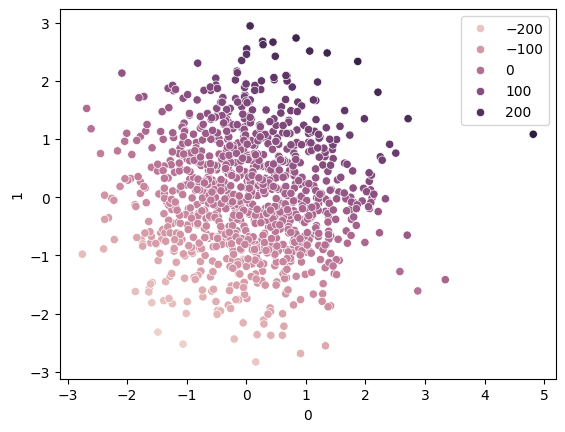

In [8]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [9]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [16]:
from sklearn.svm import SVR

In [17]:
svr=SVR(kernel='linear')

In [18]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [20]:
svr.coef_

array([[40.00848798, 74.38687766]])

In [21]:
y_pred=svr.predict(X_test)

In [22]:
y_pred

array([ -62.90177563,    9.6631441 , -162.65993233,   51.25573913,
         99.84858475,  153.30494654,   87.22542336,  -38.22737777,
         42.54341373,  -33.3316879 ,  -63.41666581,   89.2521589 ,
        -17.80790475, -102.05607051,   18.19309631,  -62.57355387,
         -4.1387935 ,  -14.1912434 ,   49.48057764,  222.98067484,
        -54.7513285 ,  -35.56305519,  -41.26904131, -106.49401439,
         99.71567199,   33.61733036,   44.20084979,   70.93569099,
         89.57715945,   22.51248538,   50.6357301 ,  -77.60078284,
        -37.02626135,   19.56901913,   84.37041475,  169.72805234,
          5.25499607,  -35.79603357,   -4.6849337 ,   -7.98429196,
        -53.67494243,  -88.23965339,  -16.34572698,  -56.19493158,
          2.32424523,  -29.76641401,   58.818178  ,  -92.64581845,
       -118.65507771,   25.10097116,   -4.23256854,   35.35602102,
       -187.5139236 ,  -84.96114361,  121.64123992,   50.33299318,
       -172.19136787,   -5.66532796,  -99.4912064 ,   49.16259

In [23]:
from sklearn.metrics import r2_score

In [24]:
print(r2_score(y_test,y_pred))

0.9984665799163635


In [26]:
param_grid={
            'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['linear'],
            'epsilon':[0.1,0.2,0.3]
}

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [29]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.795 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.790 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.781 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.801 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.793 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.795 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.790 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.781 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.801 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.793 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [31]:
grid.best_params_

{'C': 100, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [32]:
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9985382620720573
